<a href="https://colab.research.google.com/github/345ishaan/algorithmic_trading/blob/main/Stock_Mode_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install Dependencies

In [ ]:
!pip install jugaad-data
!pip install pandas
!pip install yfinance

In [ ]:
from jugaad_data.nse import stock_df
import collections
import datetime
import numpy as np
from calendar import monthrange
import calendar
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


In [ ]:
TOP_K_NSE_STOCKS = [
'Reliance Industries Ltd. - RELIANCE',
'Tata Consultancy Services Ltd. - TCS',
'HDFC Bank Ltd. - HDFCBANK',
'Infosys Ltd. - INFY',
'Housing Development Finance Corporation Ltd. - HDFC',
'ICICI Bank Ltd. - ICICIBANK',
'Kotak Mahindra Bank Ltd. - KOTAKBANK',
'Hindustan Unilever Ltd. - HINDUNILVR',
'Bajaj Finance Ltd. - BAJFINANCE',
'State Bank of India - SBIN',
'Bharti Airtel Ltd. - BHARTIARTL',
'Wipro Ltd. - WIPRO',
'ITC Ltd. - ITC',
'Larsen & Toubro Ltd. - LT',
'Asian Paints Ltd. - ASIANPAINT',
'Axis Bank Ltd. - AXISBANK',
'Mahindra & Mahindra Ltd. - M&M',
'Maruti Suzuki India Ltd. - MARUTI',
'Nestle India Ltd. - NESTLEIND',
'Sun Pharmaceutical Industries Ltd. - SUNPHARMA',
'HCL Technologies Ltd. - HCLTECH',
'Tech Mahindra Ltd. - TECHM',
'Power Grid Corporation of India Ltd. - POWERGRID',
'UltraTech Cement Ltd. - ULTRACEMCO',
'Titan Company Ltd. - TITAN',
'Britannia Industries Ltd. - BRITANNIA',
'Adani Ports and Special Economic Zone Ltd. - ADANIPORTS',
'Shree Cement Ltd. - SHREECEM',
"Dr. Reddy's Laboratories Ltd. - DRREDDY",
'Hero MotoCorp Ltd. - HEROMOTOCO',
'Bajaj Auto Ltd. - BAJAJ-AUTO',
"Divi's Laboratories Ltd. - DIVISLAB",
'Oil & Natural Gas Corporation Ltd. - ONGC',
'Coal India Ltd. - COALINDIA',
'Tata Steel Ltd. - TATASTEEL',
'Bharti Infratel Ltd. - INFRATEL',
'IndusInd Bank Ltd. - INDUSINDBK',
'SBI Life Insurance Company Ltd. - SBILIFE',
'Indian Oil Corporation Ltd. - IOC',
'NTPC Ltd. - NTPC',
'Grasim Industries Ltd. - GRASIM',
'Bharat Petroleum Corporation Ltd. - BPCL',
'JSW Steel Ltd. - JSWSTEEL',
'Tata Motors Ltd. - TATAMOTORS',
'Cipla Ltd. - CIPLA',
'Reliance Industries Ltd. - Preference Shares - RELIANCEP',
'GAIL (India) Ltd. - GAIL',
'Tata Consumer Products Ltd. - TATACONSUM',
'UltraTech Cement Ltd. - Preference Shares - ULTRACEMCOP',
'SBI Cards and Payment Services Ltd. - SBICARD',
'HDFC Life Insurance Company Ltd. - HDFCLIFE',
'Tata Power Company Ltd. - TATAPOWER',
'UltraTech Cement Ltd. - ULTRACEMCO',
'Bajaj Finserv Ltd. - BAJAJFINSV',
'SBI Life Insurance Company Ltd. - SBILIFE',
'Tata Motors Ltd. - TATAMOTORS',
'Axis Bank Ltd. - AXISBANK',
'Coal India Ltd. - COALINDIA',
'Nestle India Ltd. - NESTLEIND',
'Bharti Infratel Ltd. - INFRATEL',
'Adani Enterprises Ltd. - ADANIENT',
]

In [ ]:
#@title Params
start_year = 2016 #@param {type:"integer"}
end_year = 2022 #@param {type:"integer"}


In [ ]:
#@title Find average month change over past xx years
DELTA_MONTH = collections.defaultdict(list)
NUM_VALID = collections.defaultdict(list)
for stock in TOP_K_NSE_STOCKS:
  symbol = stock.strip().split(' - ')[-1]
  month_sum = [0 for _ in range(12)]
  month_valid = [0 for _ in range(12)]
  for year in range(start_year, end_year + 1):
    # TODO: check if we query change without asking all info in a dataframe.
    for m in range(1, 12+1):
      num_days = monthrange(year, m)[1]
      try:
        df = stock_df(symbol=symbol, from_date=datetime.date(year,m,1),
                to_date=datetime.date(year,m,num_days), series="EQ")
        delta = df.head(1)['CLOSE'].tolist()[-1] - df.tail(1)['OPEN'].tolist()[-1]
        month_sum[m] += delta
        month_valid[m] += 1
      except Exception as e:
        print(f" Not able to find data for {symbol} from_date=({year},{m},1) to_date=({year},{m},{num_days})")
  DELTA_MONTH[symbol] = [month_sum[x] / (month_valid[x] + 1e-8) for x in range(12)]
  NUM_VALID[symbol] = month_valid

Text(0, 0.5, 'Average Change')

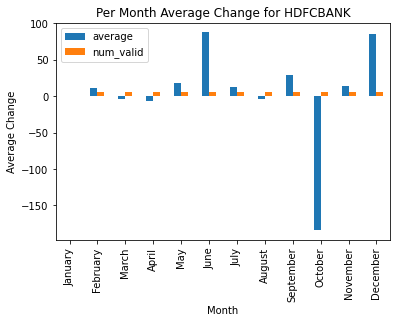

In [ ]:
#@title Plot per month bar plot given stock symbol

plot_stock_symbol = 'HDFCBANK' #@param {type:"string"}
plotdata = pd.DataFrame([{'average': DELTA_MONTH[plot_stock_symbol][x-1], 'num_valid': NUM_VALID[plot_stock_symbol][x-1]} for x in range(1, 12+1)],
                        index=[calendar.month_name[x] for x in range(1,12+1)])

plotdata.plot(kind="bar")
plt.title(f"Per Month Average Change for {plot_stock_symbol}")
plt.xlabel("Month")
plt.ylabel("Average Change")